# The Sparks Foundation
# Graduate Rotational Internship Program (GRIP) May 2021 Batch
# Data Science & Business Analytics Tasks
# Task - 1 : Predict the percentage of an student based on the no. of study hours
# Prediction using Supervised ML
## by Vinita Bhole

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Importing dataset

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.shape

(25, 2)

In [6]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data Visualization

**Let observe the distribution of data using 2-D graph**

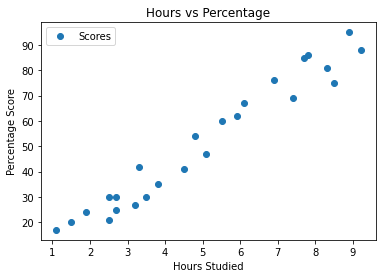

In [10]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Data Pre-Processing

**Assigning data to features(X) & labels(y)**

In [12]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

**Now Spliting data into Train data & Test data**

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Training the model

**Importing linear regression model & training the model on train dataset**

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## Testing th model

**We test the model on the test dataset**

In [17]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Comparing actual & predicted results**

In [19]:
data2 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Plotting the regression line

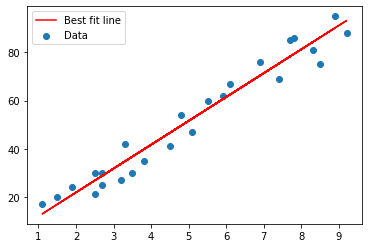

In [25]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,label='Data')
plt.plot(X, line,label='Best fit line',color='r');
plt.legend()

**Accuracy & MAE of test dataset**

In [27]:
print('Accuracy:',regressor.score(X_test,y_test))
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Accuracy: 0.9454906892105356
MAE: 4.183859899002975


## Making Predictions

In [31]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model

**Evaluation done using different matrices**

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
r2: 0.9454906892105356


## Out Come of Task-1 : If a student study for 9.25 hours then student got 93.69% marks.